In [2]:
import numpy as np
import matplotlib.pyplot as plt

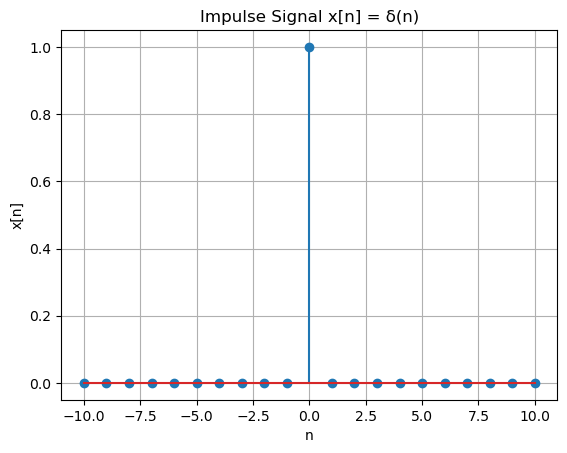

In [3]:
n = np.arange(-10, 11)  

# impulse signal
delta_n = np.zeros_like(n)  
delta_n[n == 0] = 1  

# Plot the signal
plt.stem(n, delta_n)
plt.xlabel('n')
plt.ylabel('x[n]')
plt.title('Impulse Signal x[n] = δ(n)')
plt.grid(True)
plt.show()

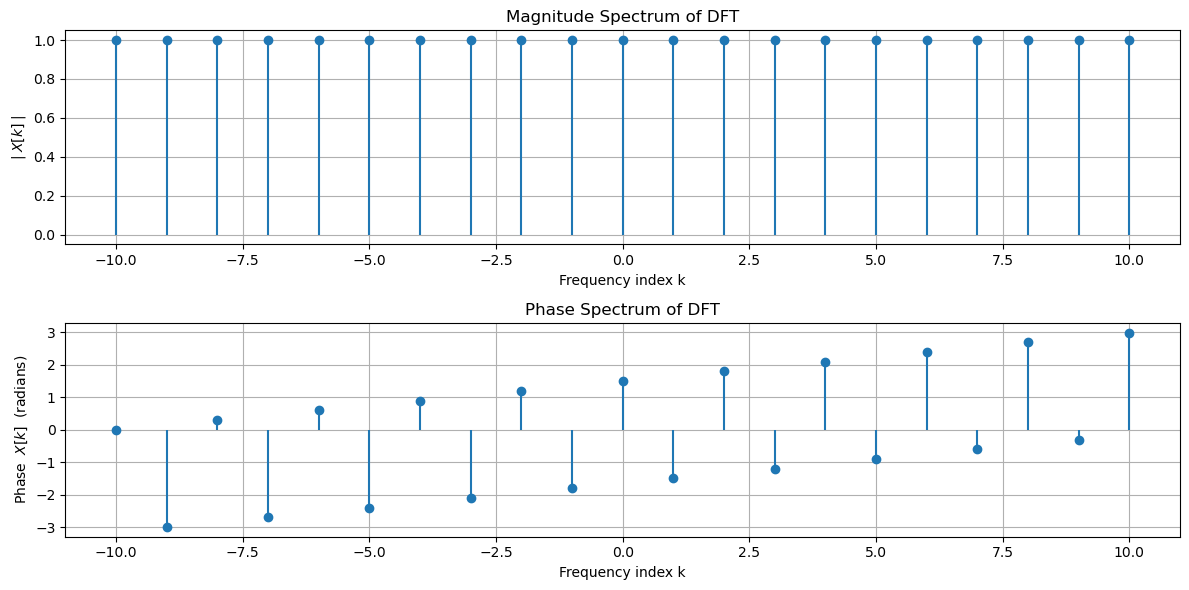

In [6]:
N = len(delta_n)  

# DFT 
X = np.zeros(N, dtype=complex)
for k in range(N):
    for m in range(N):
        X[k] += delta_n[m] * np.exp(-1j * 2 * np.pi * k * m / N)


magnitude_spectrum = np.abs(X)

phase_spectrum = np.angle(X)

# Plot 
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.stem(n, magnitude_spectrum, basefmt=" ")
plt.title('Magnitude Spectrum of DFT')
plt.xlabel('Frequency index k')
plt.ylabel('$| \; X[k] \; |$')
plt.grid(True)


plt.subplot(2, 1, 2)
plt.stem(n, phase_spectrum, basefmt=" ")
plt.title('Phase Spectrum of DFT')
plt.xlabel('Frequency index k')
plt.ylabel('Phase $\; X[k]\; $ (radians)')
plt.grid(True)

plt.tight_layout()
plt.show()


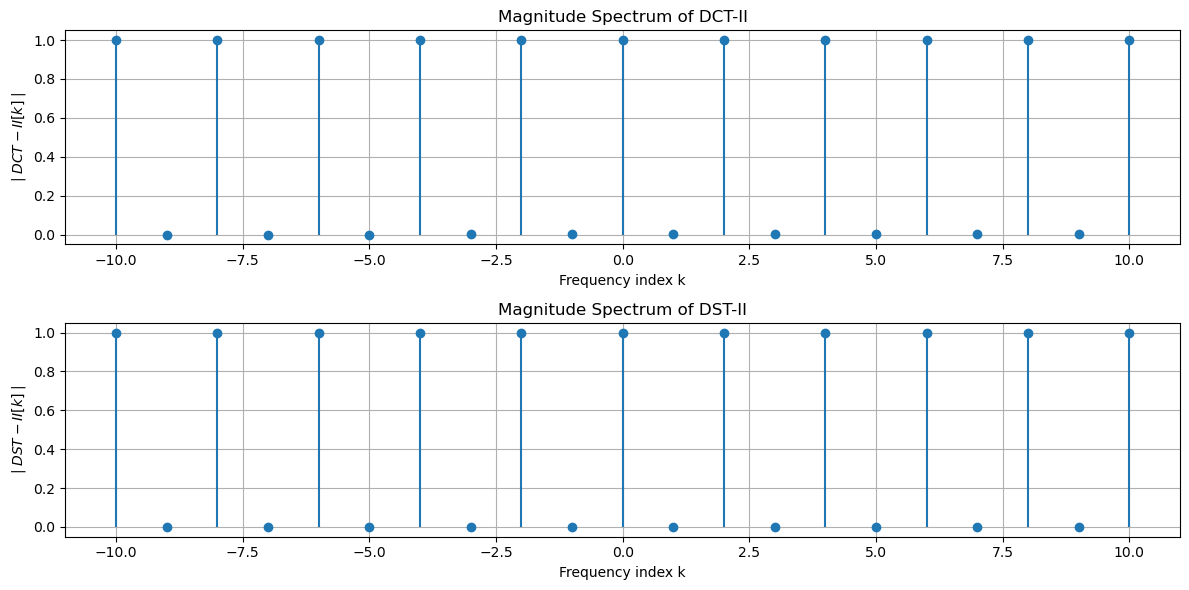

In [7]:
# DCT-II 
def dct_ii(x):
    N = len(x)
    X = np.zeros(N)
    for k in range(N):
        for n in range(N):
            X[k] += x[n] * np.cos(np.pi / N * (n + 0.5) * k)
    return X

# DST-II 
def dst_ii(x):
    N = len(x)
    Y = np.zeros(N)
    for k in range(N):
        for n in range(N):
            Y[k] += x[n] * np.sin(np.pi / N * (n + 0.5) * (k + 1))
    return Y


dct_s2 = dct_ii(delta_n)
dst_s2 = dst_ii(delta_n)

# magnitude spectrum 
magnitude_dct = np.abs(dct_s2)
magnitude_dst = np.abs(dst_s2)

# Plot
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.stem(n, magnitude_dct, basefmt=" ")
plt.title('Magnitude Spectrum of DCT-II')
plt.xlabel('Frequency index k')
plt.ylabel('$|\; DCT-II[k]\;|$')
plt.grid(True)

# Plot 
plt.subplot(2, 1, 2)
plt.stem(n, magnitude_dst, basefmt=" ")
plt.title('Magnitude Spectrum of DST-II')
plt.xlabel('Frequency index k')
plt.ylabel('$|\;DST-II[k]\;|$')
plt.grid(True)

plt.tight_layout()
plt.show()


MSE for DFT reconstruction: 0.0022675736961451243
MSE for DCT reconstruction: 3.892857142857143
MSE for DST reconstruction: 4.095238095238095


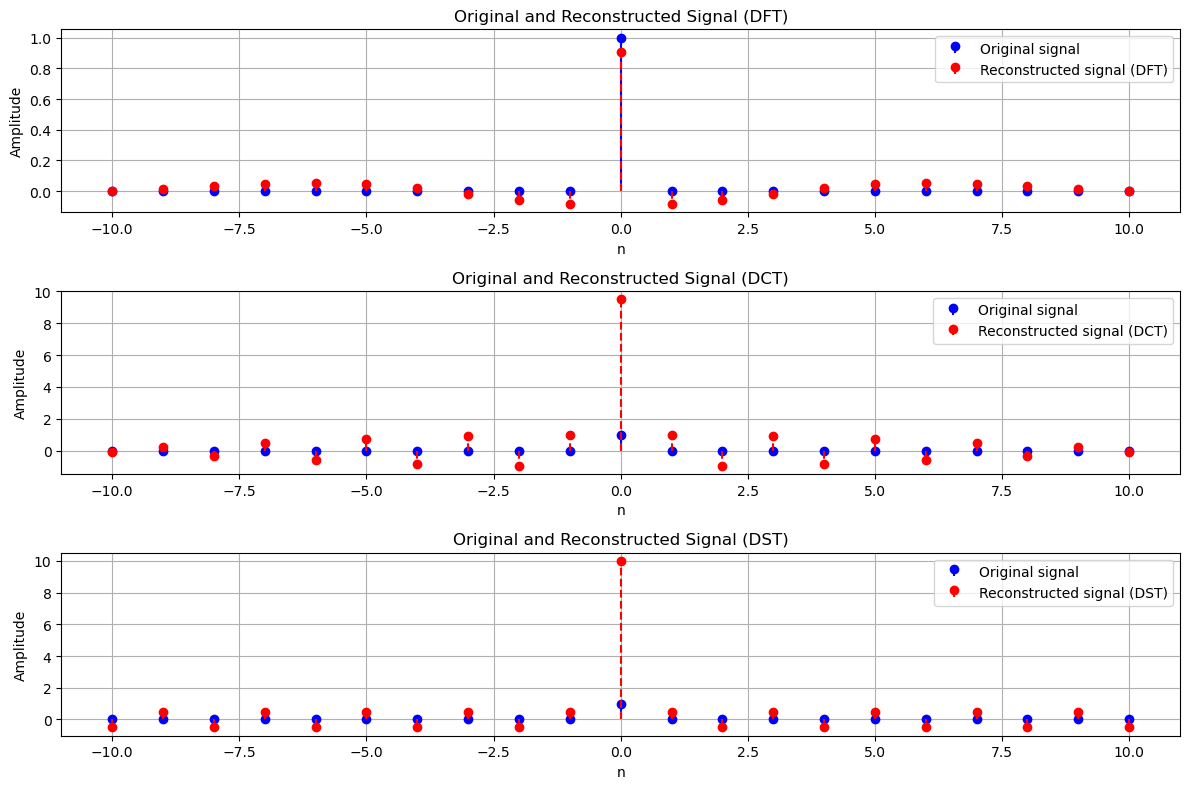

In [9]:
#1.6

def dft(x):
    N = len(x)
    X = np.zeros(N, dtype=complex)
    for k in range(N):
        for m in range(N):
            X[k] += x[m] * np.exp(-1j * 2 * np.pi * k * m / N)
    return X

def idft(X):
    N = len(X)
    x = np.zeros(N, dtype=complex)
    for n in range(N):
        for k in range(N):
            x[n] += X[k] * np.exp(1j * 2 * np.pi * k * n / N)
    return x / N


def idct_ii(X):
    N = len(X)
    x = np.zeros(N)
    for n in range(N):
        x[n] = 0.5 * X[0]
        for k in range(1, N):
            x[n] += X[k] * np.cos(np.pi / N * (n + 0.5) * k)
    return x

def idst_ii(Y):
    N = len(Y)
    x = np.zeros(N)
    for n in range(N):
        for k in range(N):
            x[n] += Y[k] * np.sin(np.pi / N * (n + 0.5) * (k + 1))
    return x

# Function 
def retain_coefficients(coefficients, percentage):
    N = len(coefficients)
    retained = np.zeros(N, dtype=coefficients.dtype)
    threshold = int(np.ceil(percentage * N))
    retained[:threshold] = coefficients[:threshold]
    return retained


dft_s2 = dft(delta_n)
dct_s2 = dct_ii(delta_n)
dst_s2 = dst_ii(delta_n)

# Retained % of the coefficients
percentage = 0.90
# percentage = 0.75
# percentage = 0.45

dft_s2_retained = retain_coefficients(dft_s2, percentage)
dct_s2_retained = retain_coefficients(dct_s2, percentage)
dst_s2_retained = retain_coefficients(dst_s2, percentage)

# Reconstruction
s2_dft_reconstructed = idft(dft_s2_retained).real
s2_dct_reconstructed = idct_ii(dct_s2_retained)
s2_dst_reconstructed = idst_ii(dst_s2_retained)


mse_dft = np.mean((delta_n - s2_dft_reconstructed) ** 2)
mse_dct = np.mean((delta_n - s2_dct_reconstructed) ** 2)
mse_dst = np.mean((delta_n - s2_dst_reconstructed) ** 2)

# MSE values
print(f"MSE for DFT reconstruction: {mse_dft}")
print(f"MSE for DCT reconstruction: {mse_dct}")
print(f"MSE for DST reconstruction: {mse_dst}")


plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.stem(n, delta_n, linefmt='b-', markerfmt='bo', basefmt=' ', label='Original signal')
plt.stem(n, s2_dft_reconstructed, linefmt='r--', markerfmt='ro', basefmt=' ', label='Reconstructed signal (DFT)')
plt.title('Original and Reconstructed Signal (DFT)')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 2)
plt.stem(n, delta_n, linefmt='b-', markerfmt='bo', basefmt=' ', label='Original signal')
plt.stem(n, s2_dct_reconstructed, linefmt='r--', markerfmt='ro', basefmt=' ', label='Reconstructed signal (DCT)')
plt.title('Original and Reconstructed Signal (DCT)')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 3)
plt.stem(n, delta_n, linefmt='b-', markerfmt='bo', basefmt=' ', label='Original signal')
plt.stem(n, s2_dst_reconstructed, linefmt='r--', markerfmt='ro', basefmt=' ', label='Reconstructed signal (DST)')
plt.title('Original and Reconstructed Signal (DST)')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
